# TNE 2: Principal Component Analysis

The purpose of this tutorial is to use Principal Component Analysis (PCA) 
for dimension reduction applied to images.


In [1]:
from pylab import *
#import numpy as np
#import matplotlib.pyplot as plt

from numpy import linalg as la

## 1. Application: handwritten digits recognition 5 & 6
We load 2 matrices which contain each a sequence of examples of 16x16 images of handwritten digits which are 5 and 6 here. Each line of the matrix contains 256 pixel values coding for the gray level of a 16x16 image.

In [2]:
train_5 = np.loadtxt('train_5.txt',delimiter=',')   # 556 samples
train_6 = np.loadtxt('train_6.txt',delimiter=',')   # 664 samples

#### Examples of images:

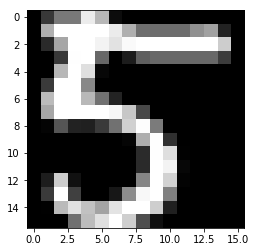

In [3]:
# Digit 5
n=9;
I = np.reshape(train_5[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

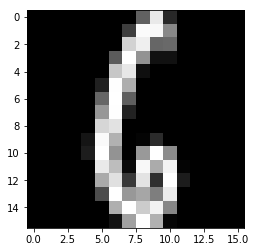

In [4]:
# Digit 6
n=5;
I = reshape(train_6[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

#### Separating the training and test sets

We keep in the training set the 145 first images of 5s and the 200 first
images of 6s:

In [5]:
x_train_brut = np.vstack((train_5[:145,:], train_6[:200,:]))
N_train = np.size(x_train_brut,axis=0)
class_train = np.ones((345,1))   # label 1 for digit 6
class_train[:145] = 0       # label 0 for digit 5

x_test_brut = np.vstack((train_5[145:,:], train_6[200:,:]))
N_test = np.size(train_5,axis=0)+np.size(train_6,axis=0)-N_train

## 2. Principal Component Analysis

The purpose of this part is to observe the respective contributions of
each component of a PCA of images of 5. The function `sklearn.decomposition.PCA` of `scikit-learn` is available. In practice, one must first estimate the mean vector and then work with centered data. 

### Documentation
First have a look at
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
    

In [6]:
# Principal component analysis
moy_train = x_train_brut.mean(axis=0)  # all the data, 5 & 6
x_train_centre = x_train_brut-np.tile(moy_train,(N_train,1))

# PCA from scikit-learn
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_centre)  # you may forget centering that is done by sklearn PCA

singval = pca.singular_values_   # eigenvalues
comp = pca.components_           # principal components
proj = pca.transform(x_train_centre)  # computes the projection coefficients

In [7]:
proj.shape

(345, 256)

### Display the averaged images of 5 & 6 respectively

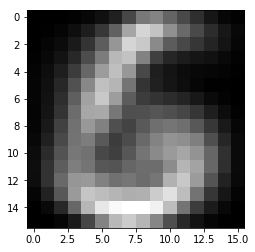

In [8]:
I_moy = np.reshape(moy_train,(16,16))   # averaged image = mean 
plt.imshow(I_moy,cmap = 'gray')
plt.show()

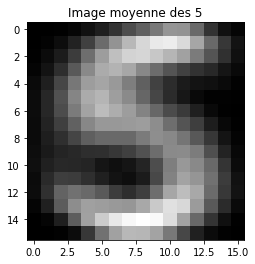

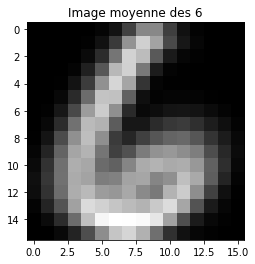

In [9]:
moy_train_5 = x_train_brut[:145,:].mean(axis=0) # averaged vectors of 5s
moy_train_6 = x_train_brut[145:,:].mean(axis=0) # averaged vectors of 6s

I_moy_5 = np.reshape(moy_train_5,(16,16))   
plt.imshow(I_moy_5,cmap = 'gray')
plt.title("Image moyenne des 5")

plt.figure()
I_moy_6 = np.reshape(moy_train_6,(16,16))   
plt.imshow(I_moy_6,cmap = 'gray')
plt.title("Image moyenne des 6")

plt.show()

### Display an example rebuilt from the 1st component only

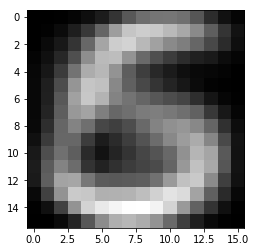

In [10]:
n=9   # choice of image no n=12 or any other

I = I_moy + proj[n,0]*np.reshape(comp[0,:],(16,16))  # adding the 1st PCA component 
plt.imshow(I,cmap='gray')
plt.show()

### Etude qualitative préliminaire

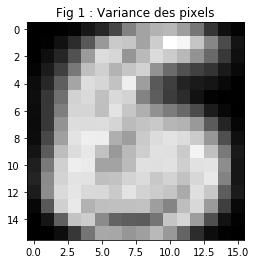

In [11]:
I = np.reshape(np.diag(x_train_centre.T.dot(x_train_centre)),(16,16))  # rendu de la variance de chaque pixel
plt.imshow(I,cmap='gray')
plt.title("Fig 1 : Variance des pixels")
plt.show()

Les pixels les plus clairs sont ceux qui ont le plus de variance dans les données. Sans surprise, les pixels sombres sont localisés sur les contours de l'image, puisque ce sont ceux qui ont le moins de variance.
Comparons la localisation des pixels clairs avec les pixels les plus représentés par les premières composantes.

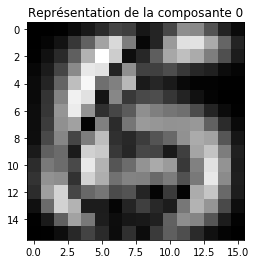

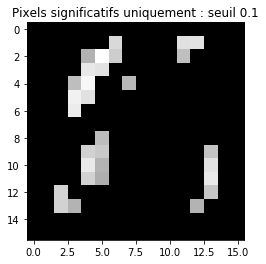

In [12]:
p = 0
t = 0.1

I = np.reshape(np.abs(comp[p,:]),(16,16))  # p-th PCA component 
plt.imshow(I,cmap='gray')
plt.title("Représentation de la composante "+str(p))

plt.figure()
I[I<t] = 0 # un seuillage fait apparaître les pixels aux coefficients associés les plus élevés
plt.imshow(I,cmap='gray')
plt.title("Pixels significatifs uniquement : seuil "+str(t))
plt.show()

Dans cette image, les pixels les plus clairs sont ceux qui sont pris en compte dans la composante *p*. La composante p (dans $R^{256}$) maximise la variance des données sous contrainte d'appartenir au sous-espace perpendiculaire aux composantes d'ordre plus élevé (composantes d'indice plus petit que *p*).

Lorsque *p* est petit, l'image obtenue fait apparaître des coefficients clairs aux mêmes endroits que sur la figure précédente précédente (fig 1 : Variance des pixels).

Voyons maintenant un ordre de grandeur du nombre de composantes parmi les premières qui sont nécessaires pour que l'image seuillée recouvre une majorité des pixels attendus (ie fig 1).

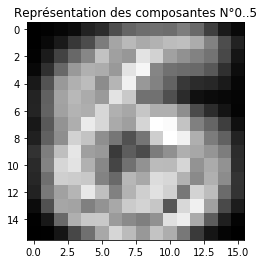

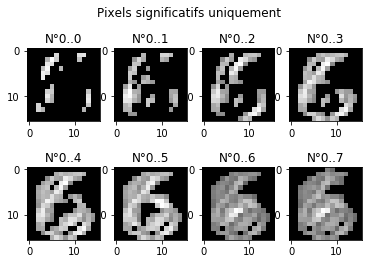

In [13]:
pmax = 5
t = 0.1
p_render = 2*4 # doit être pair

f = plt.figure()
I = np.reshape(np.max(np.abs(comp[:(pmax+1),:]),axis=0),(16,16))
 # pour chaque pixel, on prend le max des abs des pmax premières composantes
plt.imshow(I,cmap='gray')
plt.title("Représentation des composantes N°0.."+str(pmax))

f = plt.figure()
I = np.zeros((16,16))
for i in range(p_render):
    I = np.reshape(np.max(np.abs(comp[:(i+1),:]),axis=0),(16,16))
    I[I<t] = 0 # un seuillage fait apparaître les pixels aux coefficients associés les plus élevés
    plt.subplot(2,p_render/2,i+1)
    plt.imshow(I,cmap='gray')
    plt.title('N°0..'+str(i))
plt.suptitle('Pixels significatifs uniquement')
plt.show()

Tests pour pmax = 4, 10, et 40

On observe que les 5 premières composantes recouvre déjà une bonne partie des pixels utiles.

Les 41 premières composantes représentent probablement plus d'informations que nécessaire à une classification des chiffres 5 versus 6.

In [14]:
var_ratio = pca.explained_variance_ratio_   # Percentage of variance explained by each of the selected components, sum = 1
cs = np.cumsum(var_ratio)
print(cs[4],cs[10],cs[40])

0.451847805024 0.638591084682 0.891928156589


On observe ici la somme cumulée des pourcentages de variance associée aux composantes principales, et on obtient en effet que les 5 premières composantes (sur 256) contiennent à elles seules près de la moitié de la variance des données.

### Exercise 1: PCA & approximation

1. Read the documentation of function `PCA` and identify the input and output parameters.
2. Implement a progressive reconstruction of an image of digit 5 by adding the successive 
contribution of principal components.
3. Observe graphical results. How many components are necessary to obtain a 
reconstruction that you may consider as acceptable? nice? very nice?
4. Optional question: do the same for 6.

Ecrivons la décomposition SVD $M = U\Sigma V^*$
- *components_* correspond à $V^*$ (les composantes sont rangées en ligne dans *components_*)
- *singular_values_* correspond aux coefficients diagonaux de $\Sigma$
- *pca.transform(N)* correspond à la projection de $N$ selon $V^*$, soit $W_N$ telle que $N = W_NV^*$ ; à noter que $W_M = U\Sigma$ :

In [15]:
diff = (x_train_centre - pca.transform(x_train_centre).dot(comp))
np.max(np.abs(L[:])) # valeur attendue 0 si x_train_centre est à l'orinine de pca.fit()

NameError: name 'L' is not defined

(L'erreur $10^{-15}$ est due seulement à une erreur de calcul machine, on peut considérer que la différence des deux matrices est bien nulle.)

In [ ]:
n = 9
p_render = np.hstack(([0,1,2,3,4,5,6,7,8,9],np.arange(10,51,5),[255]))

f = plt.figure(figsize=(11,11))
for i in range(len(p_render)):
    I = I_moy + np.reshape(proj[n,:(p_render[i]+1)].dot(comp[:(p_render[i]+1),:]),(16,16))
    plt.subplot(4,5,i+1)
    plt.imshow(I,cmap='gray')
    plt.title('N°0..'+str(p_render[i]))
plt.suptitle('Pixels significatifs uniquement')
plt.show()

n=9 (l'image est un 5)
- On reconnaît un 5 avec plutôt bonne certitude avec 2 composantes, mais les figures avec 3 et 4 composantes sont incertaines.
- A partir de 5 composantes, il n'y a plus vraiment de doute sur le chiffre.
- A partir de 31 composantes, l'image est plus contrastée et encore plus lisible.

In [ ]:
n = 150
p_render = np.hstack(([0,1,2,3,4,5,6,7,8,9],np.arange(10,51,5),[255]))

f = plt.figure(figsize=(11,11))
for i in range(len(p_render)):
    I = I_moy + np.reshape(proj[n,:(p_render[i]+1)].dot(comp[:(p_render[i]+1),:]),(16,16))
    plt.subplot(4,5,i+1)
    plt.imshow(I,cmap='gray')
    plt.title('N°0..'+str(p_render[i]))
plt.suptitle('Pixels significatifs uniquement')
plt.show()

n=150 (l'image est un 6)
- On reconnaît un 6 avec plutôt bonne certitude dès 1 composante !
- A partir de 16 composantes, l'image est bien contrastée.

### Exercise 2: PCA & classification
1. Use `proj[0:2,:]` as the coordinates of a point representing each sample
of the training set in a plane. Display the cloud of points associated to
digits 5 and 6 by using 2 different colors.
2. Comment on the repartition of points in the plane. 
3. Do you see how this PCA step makes possible the use of a much simpler classification? 
What would you propose as an alternative to logistic regression of TP3 then?


On peut dans un premier temps visualiser les répartitions des coordonnées des projections sur les 2 premières composantes (p=0 et p=1).

In [ ]:
p = 1 # testons p=0 et p=1
x = np.hstack(([5]*145,[6]*200))
f = plt.figure(figsize=(15,5))
plt.scatter(proj[:,p],x)
plt.show()
print(np.mean(proj[:145,p]),np.mean(proj[145:,p]))
print(np.std(proj[:145,p]),np.std(proj[145:,p]))

Cette première visualisation simple fait penser à un problème de mélange de gaussiennes.

Affichons maintenant les coordonnées des projections sur les 2 premières composantes dans un repère 2D :

In [ ]:
plt.scatter(proj[:145,0],proj[:145,1],c='r',label="5") # 5s en rouge
plt.scatter(proj[145:,0],proj[145:,1],c='b',label="6") # 6s en bleu
plt.title("Projection des données dans le plan (comp[0],comp[1])")
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

On peut confirmer ici que le problème de classification peut être considéré comme un problème de mélange de gaussienne. Une approche pourrait alors être d'effectuer une QDA sur les données projetées sur les premières composantes principales issues de l'ACP.

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from numpy.random import shuffle

p = 4
qda = QuadraticDiscriminantAnalysis()

X_data = np.zeros((345,p+1))
X_data[:,0] = np.hstack(np.hstack(([5]*145,[6]*200)))
X_data[:,1:] = proj[:,:p]

shuffle(X_data)
N_train = 170
N_test = 345-N_train
X_train = X_data[:170,:]
X_test = X_data[170:,:]

qda.fit(X_train[:,1:], X_train[:,0])
erreur = np.sum(np.abs(qda.predict(X_test[:,1:])-X_test[:,0]))/N_test

print("Erreur = ",erreur)

Avec seulement 4 composantes principales, l'erreur obtenue ici est d'environ 4% contre les 8% que l'on avait obtenus avec 173 entrées au TP3, soit 2 fois moins d'erreur !

## Beyong this lab

Have a look at other examples of applications, like

http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py
    

En reconnaissance faciale, l'ACP peut permettre d'extraire à partir d'images un dictionnaire de composantes principales. Ainsi, l'information d'un visage en haute résolution peut être drastiquement compressée si l'information utile se résume par exemple au sexe de la personne, ses origines ethniques, ses lunettes, sa barbe ...

Tout comme l'exemple de reconnaissance des chiffres manuscrits, cet exemple d'application en analyse de visage est bien connu et est également utilisé dans un des TP du MOOC Coursera d'Apprentissage Automatique de Andrew Ng. :)